In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [36]:
def calc_d_theta(theta, q, k, theta_wp=0., theta_star=1.):

    d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)

    return d_theta

def calc_theta_bryn(t, q, k, theta_0=1., theta_wp=0., theta_star=1.):

    s0 = (theta_0 - theta_wp)**(1/(1-q))

    a = (1 - q) / ( ( theta_star - theta_wp ) ** q )

    theta = (- k * a * t + s0 ) ** (1/(1-q)) + theta_wp

    return theta

def calc_theta_ryoko(t, theta, q, k, theta_0=1., theta_wp=0., theta_star=1.):
    theta = theta_wp + (theta_star - theta_wp)**(1-q) * ((-k / (1-q) )* t + ((theta_0 - theta_wp)**(1-q)))**(1/(1-q))

    return theta

def calc_theta_expon(t, k, theta_0=1., theta_wp=0., theta_star=1.):

    s0 = np.log(theta_0 - theta_wp)

    a = 1 / ( theta_star - theta_wp )

    theta = np.exp(- k * a * t + s0 ) + theta_wp

    return theta

R:\Temp\ipykernel_16640\2945884765.py:13: RuntimeWarning: invalid value encountered in power
  theta = (- k * a * t + s0 ) ** (1/(1-q)) + theta_wp


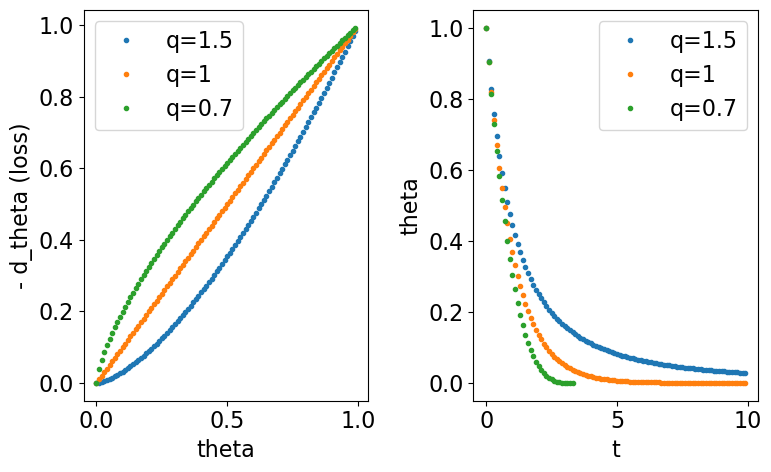

In [45]:


theta = np.arange(0, 1, 0.01)
t = np.arange(0, 10, 0.1)

# Calculate d_theta
d_theta = calc_d_theta(theta, q=1.5, k=-1)

fig = plt.figure(figsize=(8,5))

ax1 = fig.add_subplot(1,2,1)

k=1
q1 = 1.5
q2 = 0.7

ax1.plot(theta, -1*calc_d_theta(theta=theta, q=q1, k=k), '.', label=f'q={q1}')
ax1.plot(theta, -1*calc_d_theta(theta, q=1, k=k), '.', label=f'q={1}')
ax1.plot(theta, -1*calc_d_theta(theta=theta, q=q2, k=k), '.', label=f'q={q2}')
ax1.set_xlabel("theta")
ax1.set_ylabel("- d_theta (loss)")
ax1.legend()

# Plot the drawdown
ax2 = fig.add_subplot(1,2,2)
ax2.plot(t, calc_theta_bryn(t=t, q=q1, k=k), '.', label=f'q={q1}')
ax2.plot(t, calc_theta_expon(t, k=k), '.', label=f'q={1}')
ax2.plot(t, calc_theta_bryn(t=t, q=q2, k=k), '.', label=f'q={q2}')
ax2.set_xlabel("t")
ax2.set_ylabel("theta")
ax2.legend()
# ax2.set_ylim([0., 1])

fig.tight_layout()

# ax2.plot(theta, calc_theta_ryoko(t, q=1.5, k=-1.), '.')
# ax2.plot(theta, calc_theta_bryn(t, q=1., k=-1.), '.')
# ax2.plot(theta, calc_theta_ryoko(t, q=0.5, k=-1.), '.')